# Chapter 3: Graphical Causal Models

## Section 3.1. Introduction to Graphical Models

### Overview of Graphical Models

Graphical models provide a powerful framework for representing and reasoning about complex dependencies between variables. In causal inference, they help us visualize and formalize assumptions about causal relationships, using nodes to represent variables and edges to depict the causal influences between them.

The most commonly used graphical models for causal inference are **Directed Acyclic Graphs (DAGs)**. These graphs offer a structured approach to understanding the flow of causality and are particularly useful in determining the influence of interventions, highlighting pathways for potential confounding, and uncovering mediating variables.

### Types of Graphical Models
There are various types of graphical models, each serving different purposes based on the context:

* **A. Undirected Graphical Models**: Also called Markov Random Fields (MRFs), these graphs capture the dependency structure between variables but lack directionality. 

* **b. Directed Graphical Models**: This category includes Bayesian Networks and DAGs. These graphs capture the direction of influence, which aligns with the nature of cause and effect.
  
* **Partially Directed Acyclic Graphs (PDAGs) and Complete Partially Directed Acyclic Graphs (CPDAGs)**: These graphs are used when the direction of some relationships is uncertain. They are valuable in exploratory analyses where the causal structure is not fully established.

While each type of graphical model has its strengths, **DAGs** are the primary focus in causal inference because they provide explicit modeling of causal directions, so we focus on them in this chapter.

### Why DAGs are Essential for Causal Inference?

DAGs serve as a bridge between causal assumptions and statistical data. They are crucial in several key aspects of causal inference:

* **Clarity in Causal Assumptions**: DAGs allow researchers to explicitly state assumptions about which variables influence others, making the model easier to interpret and critique.

* **Understanding Confounding and Bias**: One of the most powerful features of DAGs is their ability to identify potential confounders—variables that influence both the treatment and the outcome, thereby creating bias in causal estimation. DAGs help visualize and control for these confounders.
  
* **Testable Implications**: While some causal relationships cannot be tested directly, DAGs can identify conditional independencies that are testable using statistical methods. This makes it possible to empirically assess whether the data are consistent with the proposed causal model.


Causal DAGs are **acyclic** because:
    - One cannot trace a sequence of arcs in the direction of the arrows and arrive where one started.
    - We impose acyclicness since a variable can’t cause itself.
    - The future cannot directly or indirectly cause the past.

### Real-World Applications
Graphical causal models have become an integral part of research and practice across various fields, helping to clarify complex causal relationships:
* **Epidemiology**: Used to model disease transmission and the effects of public health interventions.
* **Economics**: Applied in policy evaluation and the modeling of market dynamics.
* **Social Sciences**: Investigating the causes of social behavior and outcomes.
* **...**



### Example: Lung Cancer

Consider the following DAG with three variables: **Smoking (S)**, **Lung Cancer (L)**, and a **Genetic Factor (G)**.

- There is an arrow from Smoking to Lung Cancer (**S → L**).
- There is another arrow from the Genetic Factor to both Smoking and Lung Cancer (**G → S**, **G → L**).

1. <span style="color:blue">What does the arrow from Smoking to Lung Cancer represent in terms of how Smoking affects Lung Cancer?</span>
2. <span style="color:blue">How might the Genetic Factor (G) influence both Smoking and Lung Cancer based on the arrows in the graph?</span>


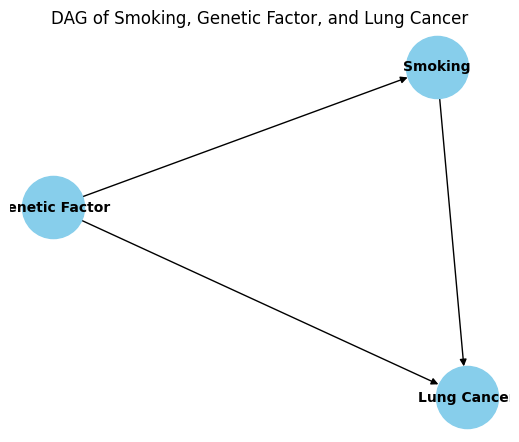

In [271]:
# Install networkx if not already installed
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
G = nx.DiGraph()

# Add nodes (variables)
G.add_nodes_from(["Genetic Factor", "Smoking", "Lung Cancer"])

# Add directed edges (causal relationships)
G.add_edges_from([
    ("Genetic Factor", "Smoking"),
    ("Genetic Factor", "Lung Cancer"),
    ("Smoking", "Lung Cancer")
])

# Draw the graph with smaller settings
plt.figure(figsize=(5, 4))  # Smaller figure size
pos = nx.spring_layout(G)  # Positioning layout for the nodes
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.title("DAG of Smoking, Genetic Factor, and Lung Cancer")
plt.show()


## Section 3.2. Types of Graph Structures and their Role in Causality

In causal inference, different types of Directed Acyclic Graph (DAG) structures play an essential role in representing and understanding causal relationships. Three primary types of DAG structures are commonly observed: **Fork (Confounder), Chain (Mediator), and V-Structure (Collider)**. Understanding these structures is crucial for identifying the appropriate causal pathways and dealing with potential biases like confounding or collider bias. But, we review some basic termonology or graphs that you may know from the past.




---

### 3.2.1. Basic Terminologies for Graphs

For our purpose, it is (very) important that we understand what kind of independence and conditional independence assumptions a graphical model entails. To understand this, let's explain some common graphical definition and structures. They will be quite simple, but they are the sufficient building blocks to understand everything about graphical models.

**Graph:** A graph $G = (V, E)$ is a set V of vertices (nodes) and a set E of edges, which can be graphically illustrated, for example:

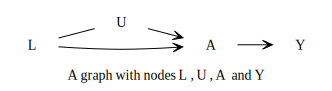

In [275]:
# Import the graphviz library
import graphviz as gr

# Create the graph
g = gr.Digraph(graph_attr={'rankdir': 'LR', 'label': "A graph with nodes L , U , A  and Y"}, 
               node_attr={'shape': 'plaintext'}, 
               edge_attr={'arrowhead': 'vee', 'arrowsize': '1'})

# Add edges
g.edge("L", "U", dir="none")
g.edge("L", "A")
g.edge("U", "A")
g.edge("A", "Y")

# Render the graph
g


**Nodes:** typically represent random variables.

**Edges (arrows):** can be undirected, directed or bi-directed and typically indicate a certain relationship between nodes or possible direct causal effects.

**Path:** A trail of edges going from one node to another, not necessarily following the direction of arrows. a path cannot cross a node more than once.

**Cyclic Graph:** A cyclic graph has at least one path that can be followed through directed edges back to the original node​

**Acyclic Graph:** An acyclic graph is a graph that contains no such cycles.

<br/><br/>
**Example: Paths in a Graph**

What are paths from $X$ to $C$ in the following graph?

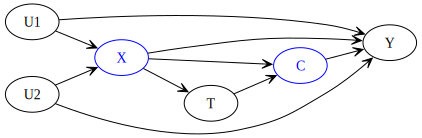

In [277]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("X", "X", color="blue", fontcolor="blue")
g.node("C", "C", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

Paths from $X$ to $C$ are:

- $ X \rightarrow C$
- $ X \rightarrow T \rightarrow C$
- $ X \rightarrow U_2 \rightarrow Y \rightarrow C$
- $ X \rightarrow U_1 \rightarrow Y \rightarrow C$ 

### More Terminologies:

**Children and Parents:** Nodes directly affected by and affecting other nodes respectively.​

**Ancestors and Descendants:** Nodes directly or indirectly affected by and affecting other nodes

**Exogenous and Endogenous Nodes:** Nodes without and with parents respectively​


<br/><br/>
**Example: Parentship in a Graph**

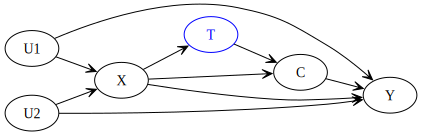

In [280]:
g = gr.Digraph(graph_attr={'rankdir':'LR'}, 
               edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.node("T", "T", color="blue", fontcolor="blue")
g.edge("U1", "Y")
g.edge("U1", "X")
g.edge("U2", "X")
g.edge("U2", "Y")
g.edge("X", "T")
g.edge("T", "C")
g.edge("C", "Y")
g.edge("X", "C")
g.edge("X", "Y")
g

Here are parental relations in the graph:

**Parents:** $pa(T) = \{ X \}$​

**Children:** $ch(T) = \{ C \}$​

**Ancestors:** $anc(T) = \{ X, U_1, U_2 \}$​

**Descendants:** $desc(T) = \{ C, Y \}$​

<br/><br/>

---
### 3.2.2. Major DAG Structures

In causal inference, different types of Directed Acyclic Graph (DAG) structures play an essential role in representing and understanding causal relationships. Three primary types of DAG structures are commonly observed: **Fork (Confounder), Chain (Mediator), and V-Structure (Collider)**. Understanding these structures is crucial for identifying the appropriate causal pathways and dealing with potential biases like confounding or collider bias.


### Major DAG Structure 1: Fork (Confounder)

A **fork structure** occurs when a common cause (or confounder) affects both the treatment and the outcome. This type of structure is represented as:

- $A ← C → B$, where:
  - $C$ is the confounder.
  - $C$ is a common cause of $A$ and $B$. 
  - $A$ and $B$ are both influenced by $C$.
  - $A$ and $B$ have a common cause (direct or indirect). 
  - $A$ and $B$ are often referred to as "children" or "descendants" of the common cause.

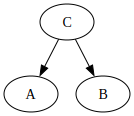

In [283]:

import graphviz as gr

# Create a fork structure (confounder)
fork_dag = gr.Digraph()

# Add edges
fork_dag.edge("C", "A")
fork_dag.edge("C", "B")

# Render the graph
fork_dag


- Since Fork $C$ is a common cause of $A$ and $B$, $A$ and $B$ are not independent in general.

    $A \not\!\perp\!\!\!\perp B$ 

- In fork structure, the dependence flows backward through the arrows and we have what is called a **backdoor path**. 

- We can close the backdoor path and shut down dependence by conditioning on the common cause.

    $A \!\perp\!\!\!\perp B | C$


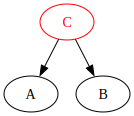

In [285]:
import graphviz as gr

# Create a fork structure (confounder)
fork_dag = gr.Digraph()

# Add node C with red border and label
fork_dag.node("C", color="red", fontcolor="red")

# Add edges
fork_dag.edge("C", "A")
fork_dag.edge("C", "B")

# Render the graph
fork_dag



### Fork Bias
- Forks represent situations where two variables appear to be associated or correlated, but the association is not due to a direct causal relationship between them. Instead, the association is induced by the shared influence of the common cause.

- Failure to address a fork confounder can lead to biased estimates of the causal effect between the treatment and outcome. Neglecting the confounder can result in mistakenly attributing the observed association to a direct causal effect, when it is actually due, at least in part, to the unmeasured confounder.
  
- This bias is also called **[confounding bias](https://catalogofbias.org/biases/confounding/)**.

## Confounder Structure Example: Ice Cream Consumption, Sunburns, and Hot Temperature

In hot summer months, people tend to consume more ice cream and are also more likely to get sunburns. While it might seem that **Ice Cream Consumption** and **Number of Sunburns** are related, this relationship is actually driven by a third variable, **Hot Temperature**. 

<img src="img/ch3/IceCream-Sunburn.png" alt="img" width="500"/>

This is an example of a **fork structure** where **Hot Temperature (T)** is the common cause (confounder) that influences both **Ice Cream Consumption (I)** and **Number of Sunburns (S)**. Understanding this structure helps to avoid drawing spurious conclusions about the relationship between **I** and **S**.


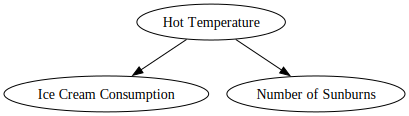

In [288]:
### 1. Visualize the DAG (Fork Structure)
import graphviz as gr

# Create a fork structure for Ice Cream and Sunburns example
fork_dag = gr.Digraph()

# Add nodes
fork_dag.node("T", label="Hot Temperature", color="black", fontcolor="black")
fork_dag.node("I", label="Ice Cream Consumption", color="black", fontcolor="black")
fork_dag.node("S", label="Number of Sunburns", color="black", fontcolor="black")

# Add edges representing the fork structure
fork_dag.edge("T", "I")  # Hot Temperature influences Ice Cream Consumption
fork_dag.edge("T", "S")  # Hot Temperature influences Number of Sunburns

# Render the graph
fork_dag

### Simulate Data for Ice Cream, Sunburns, and Hot Temperature
Let's generate synthetic data for the three variables:
- **Hot Temperature (T)** drives both **Ice Cream Consumption (I)** and **Number of Sunburns (S)**.


In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Hot Temperature (T)
hot_temperature = np.random.normal(loc=30, scale=5, size=100)  # Average temperature of 30 degrees with some variation

# Simulating Ice Cream Consumption (I) based on Temperature (T)
ice_cream_consumption = 2 * hot_temperature + np.random.normal(loc=0, scale=5, size=100)  # Higher temperature, more ice cream

# Simulating Number of Sunburns (S) based on Temperature (T)
number_of_sunburns = 1.5 * hot_temperature + np.random.normal(loc=0, scale=3, size=100)  # Higher temperature, more sunburns

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Hot Temperature': hot_temperature,
    'Ice Cream Consumption': ice_cream_consumption,
    'Number of Sunburns': number_of_sunburns
})

# Display the first few rows of the dataset
data.head()


,Hot Temperature,Ice Cream Consumption,Number of Sunburns
0,32.483571,57.890288,49.798718
1,29.308678,56.514130,45.645371
2,33.238443,64.763313,53.106818
3,37.615149,71.218912,59.584130
4,28.829233,56.852038,39.110842


### Explore Relationships
We now use a scatter plot matrix to visualize the pairwise relationships between **Hot Temperature**, **Ice Cream Consumption**, and **Number of Sunburns**.


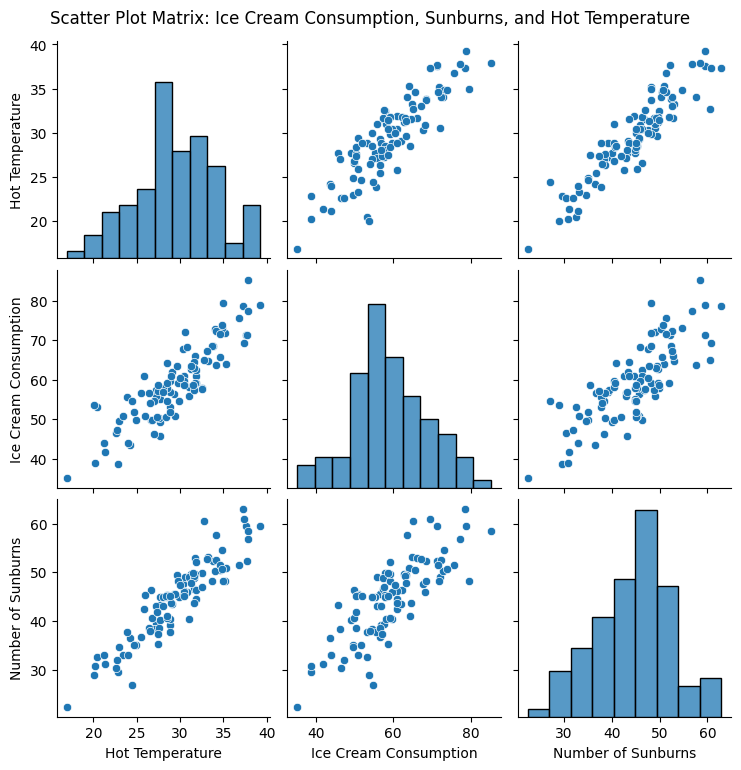

In [292]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Ice Cream Consumption, Sunburns, and Hot Temperature", y=1.02)
plt.show()


### Observations

From the **scatter plot matrix**, you can observe:
- **Hot Temperature** has a positive correlation with both **Ice Cream Consumption** and **Number of Sunburns**. This makes sense because hotter days lead to more ice cream consumption and an increased likelihood of sunburns.
- There may also appear to be a correlation between **Ice Cream Consumption** and **Number of Sunburns**. However, this is a spurious correlation driven by the confounding effect of **Hot Temperature**. 

Without accounting for **Hot Temperature**, we might mistakenly conclude that eating more ice cream causes sunburns, but the true underlying cause is the hotter weather.


---

### Major DAG Structure 2: Chain (Mediator)

A **chain structure** represents a causal pathway where one variable transmits the effect of the cause to the outcome. This structure is represented as:

- $A → C → B$, where:
  - $A$ is the cause.
  - $C$ is the mediator.
  - $B$ is the outcome.
  - A node $C$ is a mediator if it lies on a directed path from $A$ to $B$.


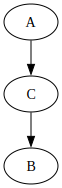

In [295]:
# Create a chain structure (mediator)
chain_dag = gr.Digraph()

# Add edges
chain_dag.edge("A", "C")
chain_dag.edge("C", "B")

# Render the graph
chain_dag


As a general rule, the dependence flow in the direct path from $A$ to $B$ is blocked when we condition on an intermediary variable $C$.

  - $A \not\!\perp\!\!\!\perp B$   

  - $A \!\perp\!\!\!\perp B | C$ 

In this case, $C$ mediates the relationship between $A$ and $B$. It is important to distinguish this indirect path from a direct causal effect between $A$ and $B$.

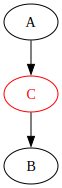

In [297]:
import graphviz as gr

# Create a chain structure (mediator)
chain_dag = gr.Digraph()

# Add node C with red border and red font
chain_dag.node("C", color="red", fontcolor="red")

# Add edges representing the chain structure
chain_dag.edge("A", "C")
chain_dag.edge("C", "B")

# Render the graph
chain_dag

### Chain Structure Example: Exercise, Weight Loss, and Heart Health

### Background:
In this example, we explore how **Exercise** leads to **Weight Loss**, which in turn improves **Heart Health**. This represents a **chain structure**, where **Exercise (X)** influences **Weight Loss (M)**, and **Weight Loss** mediates the effect of **Exercise** on **Heart Health (Y)**.

This scenario helps illustrate mediation, where the effect of Exercise on Heart Health is both direct and indirect, through the intermediate variable of Weight Loss.

- **Exercise (X)** → leads to → **Weight Loss (M)** → leads to → **Improved Heart Health (Y)**.


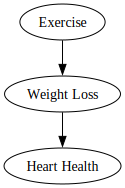

In [299]:
import graphviz as gr

# Create a chain structure for Exercise, Weight Loss, and Heart Health
chain_dag = gr.Digraph()

# Add nodes
chain_dag.node("X", label="Exercise")
chain_dag.node("M", label="Weight Loss")
chain_dag.node("Y", label="Heart Health")

# Add edges representing the chain structure
chain_dag.edge("X", "M")  # Exercise leads to Weight Loss
chain_dag.edge("M", "Y")  # Weight Loss leads to Improved Heart Health

# Render the graph
chain_dag



### Simulate Data for the Chain Structure

Next, we simulate synthetic data to model the relationships between **Exercise**, **Weight Loss**, and **Heart Health**.


In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Exercise (X)
exercise = np.random.normal(loc=10, scale=2, size=100)  # Average exercise hours per week with some variation

# Simulating Weight Loss (M) based on Exercise (X)
weight_loss = 5 * exercise + np.random.normal(loc=0, scale=3, size=100)  # More exercise leads to greater weight loss

# Simulating Heart Health (Y) based on Weight Loss (M)
heart_health = 3 * weight_loss + np.random.normal(loc=0, scale=5, size=100)  # Greater weight loss improves heart health

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Exercise': exercise,
    'Weight Loss': weight_loss,
    'Heart Health': heart_health
})

# Display the first few rows of the dataset
data.head()


,Exercise,Weight Loss,Heart Health
0,10.993428,50.721029,153.952025
1,9.723471,47.355421,144.870186
2,11.295377,55.448742,171.761482
3,13.046060,62.823467,193.739411
4,9.531693,47.174609,134.635481



### Explore Relationships

We will now create a scatter plot matrix to visualize the pairwise relationships between **Exercise**, **Weight Loss**, and **Heart Health**.


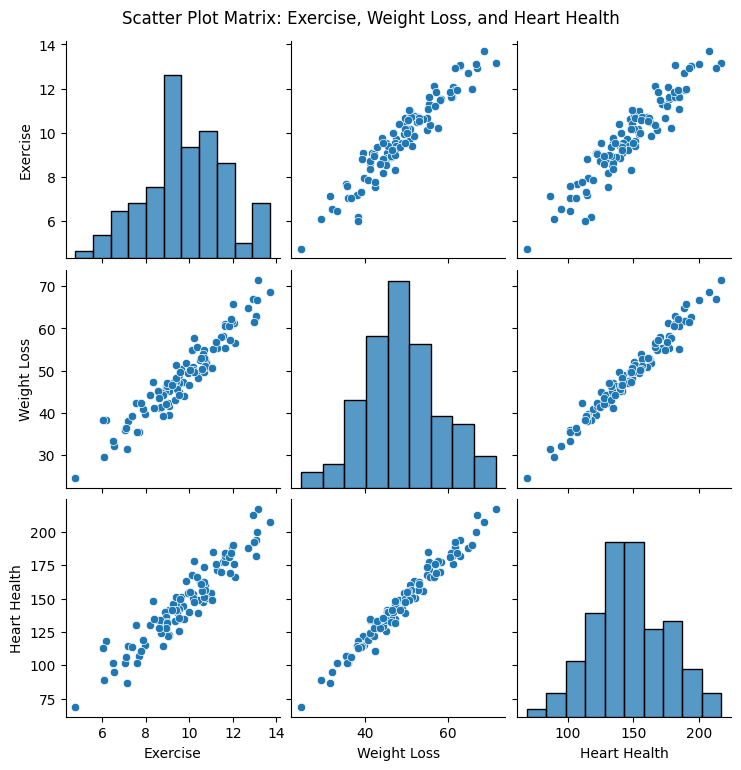

In [303]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Exercise, Weight Loss, and Heart Health", y=1.02)
plt.show()


### Observations:

- **Exercise and Weight Loss**: There is a strong positive relationship between Exercise and Weight Loss. More exercise leads to greater weight loss.
  
- **Weight Loss and Heart Health**: A positive relationship also exists between Weight Loss and Heart Health. Weight loss improves heart health.

- **Exercise and Heart Health**: While Exercise is positively related to Heart Health, it is important to note that the relationship is **partly indirect** through Weight Loss.

- **Exercise** directly influences **Weight Loss**, which in turn influences **Heart Health**. This is a **mediating relationship**, where the effect of Exercise on Heart Health is mediated by Weight Loss.

---

### Major DAG Structure 3: V-Structure (Collider)

A **V-structure**, or **collider**, occurs when two variables have a common effect. This structure is represented as:

- $A → C ← B$, where:
  - $A$ and $B$ are independent causes of the collider $C$.
  $A \!\perp\!\!\!\perp B$   


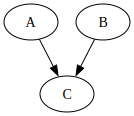

In [306]:
# Create a V-structure (collider)
vstructure_dag = gr.Digraph()

# Add edges
vstructure_dag.edge("A", "C")
vstructure_dag.edge("B", "C")

# Render the graph
vstructure_dag


- As a general rule, **conditioning (adjusting or controlling)** on a collider opens the causal path. Not conditioning on it leaves it closed.
- This phenomenon is sometimes called **explaining away**, because one cause already explains the effect, making the other cause less likely.

  $A \not\!\perp\!\!\!\perp B | C$ 

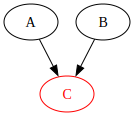

In [308]:
import graphviz as gr

# Create a V-structure (collider)
vstructure_dag = gr.Digraph()

# Add node C with red border and red label
vstructure_dag.node("C", color="red", fontcolor="red")

# Add edges representing the V-structure
vstructure_dag.edge("A", "C")
vstructure_dag.edge("B", "C")

# Render the graph
vstructure_dag


### Collider Bias or Berkson's paradox

- **Conditioning on** or **observing** a collider can lead to spurious associations between the variables that connect it. This phenomenon is known as **[collider bias](https://catalogofbias.org/biases/collider-bias/)** or **Berkson's paradox**.
  
- It occurs because conditioning on a collider variable can induce a correlation between the variables that influence it, even if they are not causally related.

  

### Collider Structure Example: Job Skill, Family Connections, and Job Offer

### Background:

In this example, we explore how two independent factors, **Job Skill** and **Family Connections**, affect the likelihood of receiving a **Job Offer**. This represents a **collider structure**, where both **Job Skill (A)** and **Family Connections (B)** influence the **Job Offer (C)** independently.

Importantly, if we were to condition on **Job Offer (the collider)**, a spurious relationship might appear between **Job Skill** and **Family Connections**, even though they are actually independent.

In this scenario:
- **Job Skill (A)** → **Job Offer (C)** ← **Family Connections (B)**


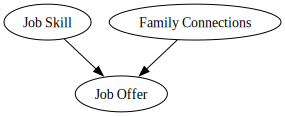

In [311]:
import graphviz as gr

# Create a V-structure (collider) for Job Skill, Family Connections, and Job Offer
vstructure_dag = gr.Digraph()

# Add nodes
vstructure_dag.node("A", label="Job Skill")
vstructure_dag.node("B", label="Family Connections")
vstructure_dag.node("C", label="Job Offer")  # Default color for Job Offer

# Add edges representing the collider structure
vstructure_dag.edge("A", "C")  # Job Skill influences Job Offer
vstructure_dag.edge("B", "C")  # Family Connections influence Job Offer

# Render the graph
vstructure_dag




### Simulate Data for the Collider Structure

Now, we will simulate some synthetic data for **Job Skill (A)**, **Family Connections (B)**, and **Job Offer (C)**.


In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Job Skill (A)
job_skill = np.random.normal(loc=70, scale=10, size=100)  # Average job skill score (out of 100)

# Simulating Family Connections (B)
family_connections = np.random.normal(loc=50, scale=15, size=100)  # Family connections score (out of 100)

# Simulating Job Offer (C) based on both Job Skill and Family Connections
job_offer = 0.3 * job_skill + 0.4 * family_connections + np.random.normal(loc=0, scale=5, size=100)  # Job Offer score

# Creating a DataFrame for the data
data = pd.DataFrame({
    'Job Skill': job_skill,
    'Family Connections': family_connections,
    'Job Offer': job_offer
})

# Display the first few rows of the dataset
data.head()


,Job Skill,Family Connections,Job Offer
0,74.967142,28.769439,35.786855
1,68.617357,43.690320,40.865258
2,76.476885,44.859282,46.302035
3,85.230299,37.965841,46.024436
4,67.658466,47.580714,32.441479



### Explore Relationships

We will now create a scatter plot matrix to visualize the pairwise relationships between **Job Skill**, **Family Connections**, and **Job Offer**.


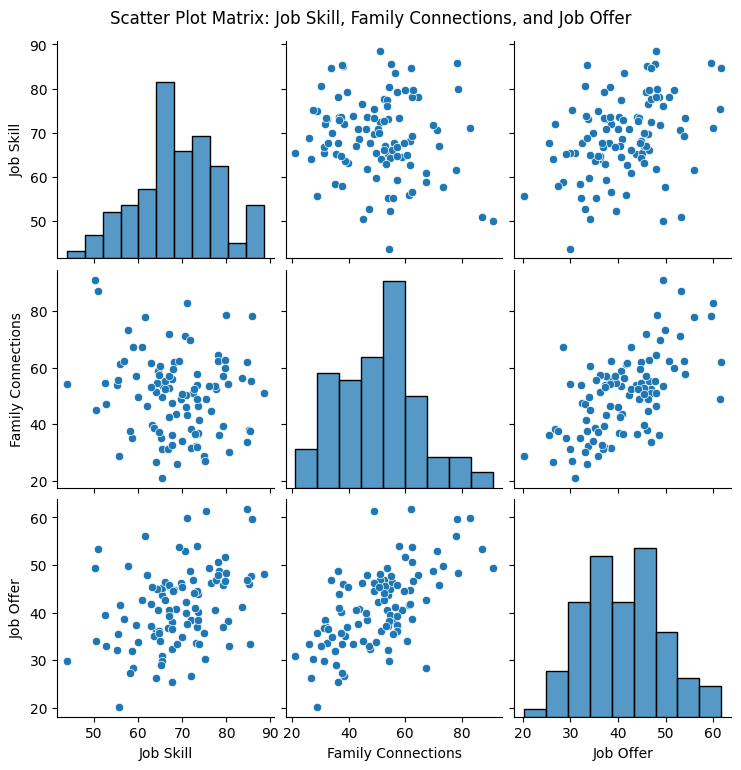

In [315]:
# Visualizing the scatter plot matrix
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix: Job Skill, Family Connections, and Job Offer", y=1.02)
plt.show()



### Observations:

- **Job Skill and Job Offer**: A positive relationship is observed between **Job Skill** and **Job Offer**. The higher the job skill, the more likely a person is to receive a job offer.
  
- **Family Connections and Job Offer**: Similarly, a positive relationship exists between **Family Connections** and **Job Offer**. The stronger the family connections, the more likely a person is to receive a job offer.

- **Job Skill and Family Connections**: While **Job Skill** and **Family Connections** are independent in reality, they might appear correlated if we condition on **Job Offer** (the collider). This could create a spurious relationship between the two factors due to **collider bias**.


- In the **collider structure**, both **Job Skill** and **Family Connections** affect the **Job Offer** independently. If we mistakenly control for **Job Offer** (e.g., by looking only at people who received a job offer), we might observe a false relationship between **Job Skill** and **Family Connections**.
  
---


### Causal Paths

A causal path describes the flow of influence or the causal mechanism from an initial variable ("cause" or "exposure") to a final variable ("effect" or "outcome") through a series of intermediate variables.

The causal path from $X$ to $C$ mediate the causal effect of $X$ on $C$, the non-causal path do not.

For example in the graphs below, the causal path between $X$ and $C$ are highlighted in red.

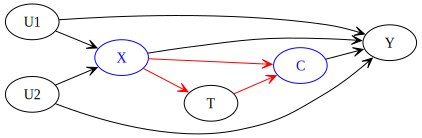

In [318]:
import graphviz as gr

# Create the DAG with improved consistency
g = gr.Digraph(
    graph_attr={'rankdir': 'LR'},  # Left-to-right layout for consistency
    edge_attr={'arrowhead': 'vee', 'arrowsize': '1'}  # Consistent edge styling
)

# Add nodes with consistent color and styling
g.node("X", "X", color="blue", fontcolor="blue")  # X node in blue
g.node("C", "C", color="blue", fontcolor="blue")  # C node in blue

# Add edges for unobserved confounders U1 and U2
g.edge("U1", "Y")  # U1 influences Y
g.edge("U1", "X")  # U1 influences X
g.edge("U2", "X")  # U2 influences X
g.edge("U2", "Y")  # U2 influences Y

# Add edges representing relationships between X, T, C, and Y
g.edge("X", "T", color="red", fontcolor="red")  # X to T (red for emphasis)
g.edge("T", "C", color="red", fontcolor="red")  # T to C (red for emphasis)
g.edge("C", "Y")  # C to Y
g.edge("X", "C", color="red", fontcolor="red")  # X to C (red for emphasis)
g.edge("X", "Y")  # X to Y

# Render the graph
g


### Path Blocking Rules

Path blocking in Directed Acyclic Graphs (DAGs) refers to the process of identifying variables or conditions that can close or block a specific causal path between two variables. It involves determining which variables need to be controlled for or conditioned on to prevent spurious associations or biases when estimating causal effects.

An **active path** is *open* and allows for potential causal influence between the variables, while an **inactive path** is *blocked* or closed, preventing any direct causal influence.

Path are either open or blocked, according to two rules:

- **Rule 1:** A path is blocked if somewhere along the path, there is a variable $C$ that sits in a *chain*, or sits in a *fork* and we have conditioned for $C$. 

- **Rule 2:** A path is blocked if somewhere along the path, there is a variable $C$ that sits in a *collider* and we have not conditioned for $C$, or any of its descendents.

### Path Blocking Example: a 4 Nodes Graph

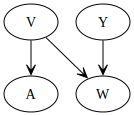

In [321]:
g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("V", "A")
g.edge("V", "W")
g.edge("Y", "W")
g

From the causal graph above we notice that:
- Conditioning for **V** blocks the path from **A** to **W** (rule 1) 
- Conditioning for **W** leaves the path open (rule 2) from **A** to **Y**. 
- Conditioning for both **V** and **W** blocks the path from **A** to **Y**.

---

 ## Section 3.3. d-Separation and Independence Assumptions

We have seen follwing concepts in the previous section. We repeat them with a slighly diffrent language to better explan the d-Separation Basics.

* In a DAG, a **path** is a sequence of edges that connect two nodes. These paths can carry associations or causal influences. To assess whether two variables are conditionally independent, we use **d-separation** to block the paths between them.

* Different types of Structures that Affect d-Separation:

    #### Chain Example ($A → B → C$):
    - Without conditioning, $A$ and $C$ are dependent because information flows through $B$.
    - If we condition on $B$ (i.e., we know B's value), the path is blocked, and $A$ becomes independent of $C$.
    
    #### Fork Example ($A ← B → C$):
    - Without conditioning, $A$ and $C$ are dependent because they share a common cause, $B$.
    - Conditioning on $B$ blocks the path and renders $A$ and $C$ independent.
    
    #### Collider Example ($A → B ← C$):
    - Without conditioning, $A$ and $C$ are independent because the path is blocked at $C$ (the collider).
    - If we condition on $B$ or its descendants, the path is unblocked, and $A$ and $C$ become dependent (collider bias).



### Example: d-sepeartion in a Chain Structure (A → B → C)

We will simulate data for a chain structure and test if $A$ and $C$ become independent when conditioned on $C$ using statistical tests.


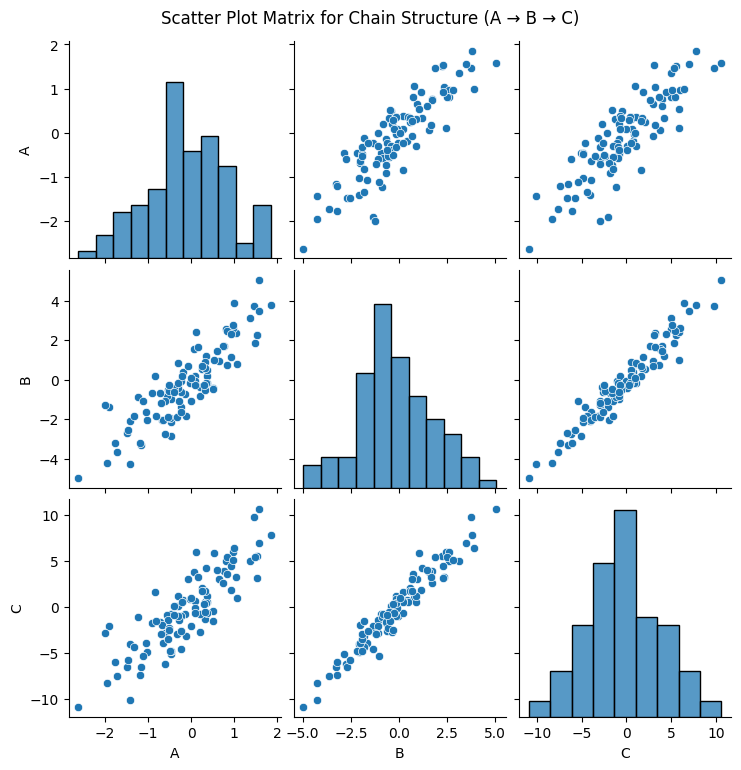

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating data for a chain structure (A → B → C)
np.random.seed(42)
A = np.random.normal(size=100)
B = 2 * A + np.random.normal(size=100)
C = 2 * B + np.random.normal(size=100)

# Create a DataFrame for the data
data = pd.DataFrame({'A': A, 'B': B, 'C': C})

# Display the first few rows
data.head()

# Scatter plot matrix to explore the relationships
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix for Chain Structure (A → B → C)", y=1.02)
plt.show()


### Observing Relationships:

- In the scatter plot matrix, you should observe a strong relationship between **A and B** and between **B and C**.
- However, **A and C** also appear to be correlated because information is flowing from $A$ to $C$ through $B$.

Now, let's condition on $B$ to see if $A$ and $C$ become independent.


In [416]:
import statsmodels.api as sm
from scipy.stats import pearsonr

# Fit a regression model of C ~ B
model = sm.OLS(C, sm.add_constant(B)).fit()

# Get the residuals, which represent the portion of C not explained by B
residuals = model.resid

# Test for independence between A and the residuals
corr, p_value = pearsonr(A, residuals)

print(f"Correlation between A and residuals of C ~ B: {corr:.3f}, p-value: {p_value:.3f}")

# The correlation should be close to 0, and the p-value should indicate independence (i.e., a large p-value).


Correlation between A and residuals of C ~ B: 0.051, p-value: 0.616


### Conclusion:

- If the correlation between **A** and the residuals of **C** (after conditioning on **B**) is near zero and the p-value is large, we can conclude that **A** and **C** are conditionally independent given **B**.
  
- This demonstrates how **d-separation** helps us identify conditional independence by blocking paths in the DAG.

---


### d-Separation Rules 


D-separation relies on a set of rules, often referred to as path blocking rules or **d-separation rules**, to determine when a path is blocked. These rules identify the necessary variables to condition on to close a specific path and prevent spurious associations or biases in estimating causal effects.


**d-separation in Sets:** Sets of variables $A$ and $B$ are d-separated (or blocked) by $C$ if all paths between $A$ and $B$ are blocked by $C$. d-separation implies: 

$A \perp \!\!\! \perp B | C$.


**d-separation in Paths:** D-separation determines which paths transmit association, and which ones don’t.
Formally, a path **P** is said to be d-separated (or blocked) by a conditioning set of nodes $\{Z\}$ if:

1. **P** contains a chain $A \rightarrow M \rightarrow B$ or a fork $A \leftarrow M \rightarrow B$ such that the middle node $M$ is in $\{Z\}$, or
2. **P** contains a collider $A \rightarrow M \leftarrow B$ such that neither the middle node $M$, nor any descendant of $M$, is in $\{Z\}$.


**d-connected in Paths:** A path **P** is said to be d-connected (or unblocked or open) by a conditioning set of nodes $\{Z\}$ if it is not d-separated.


In other words:

- *Blocked* (d-separated) paths don’t transmit association (information). 

- *Unblocked* (d-connected) paths may transmit association (information).


<br/>
The three aforementioned blocking criteria can be rephased as: 

- Conditioning on a non-collider blocks a path, 

- Conditioning on a collider, or a descendent of a collider, unblocks a path, 

- Not conditioning on a collider leaves a path “naturally” blocked.



### Path Blocking and Independence 

- Two variables that are d-separated along all paths given $\{Z\}$ are <font color='red'>conditionally independent given $\{Z\}$.</font>

- Two variables that are *NOT* d-separated along all paths given $\{Z\}$ are <font color='red'>potentially dependent given $\{Z\}$.</font>

### d-Separation Example, a 10 Nodes Graph

We use the following DAG from [Bardy Neal course](https://www.bradyneal.com/causal-inference-course) to see blocked and un-blocked pathes between $T$ and $Y$ for different controlling (conditioning) cases.

![img](img/ch3/graph_Dsep_example_case0.png)

<br/><br/>
**Case 1:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1$  valid?

![img](img/ch3/graph_Dsep_example_case1.png)




**NO!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is not blocked.
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 2:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2 $  valid?  

![img](img/ch3/graph_Dsep_example_case2.png)


**YES!**, 
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set) 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 3:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_3 $  valid?  

![img](img/ch3/graph_Dsep_example_case3.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_3$ is in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked.

<br/><br/>
**Case 4:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_1, W_2, X_2$  valid?  

![img](img/ch3/graph_Dsep_example_case4.png)

**NO!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is NOT blocked ($X_2$ is in the conditioning set)

<br/><br/>
**Case 5:** In the following graph, is  $T \perp \!\!\! \perp Y | M_1, W_2, W_3, X_1, X_2?$  valid?

![img](img/ch3/graph_Dsep_example_case5.png)

**YES!**,
- the chain path $T-M_1-M_2-Y$ is blocked ($M_1$ is in the conditioning set). 
- the fork path $T-W_1-W_2-W_3-Y$ is blocked ($W_2, W_3$ are in the conditioning set).
- the collider path $T-X_1-X_2-X_3-Y$ is blocked ($X_1$ is in the conditioning set)

### Example: d-separation test with Python

Testing the d-separation manually is not feasible for large graphs.
We can use the [networkx](https://networkx.org) python library instead to test for conditional independence.

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

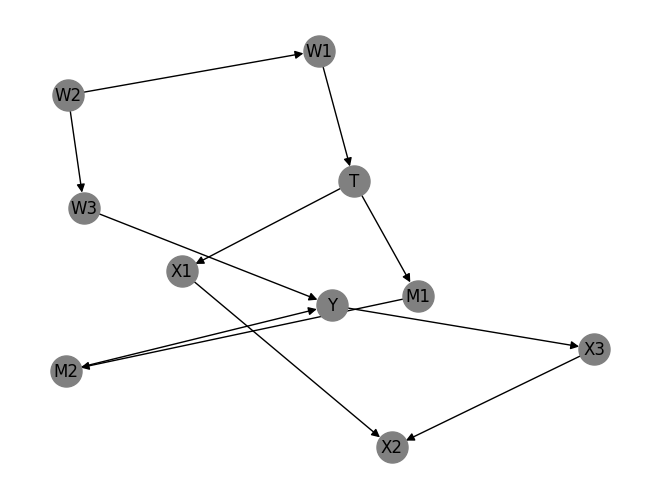

In [427]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [
        ("T", "M1"),
        ("M1", "M2"),
        ("M2", "Y"),
        #
        ("T", "X1"),
        ("X1", "X2"),
        ("Y", "X3"),
        ("X3", "X2"),
        #
        ("W1", "T"),
        ("W2", "W1"),
        ("W2", "W3"),
        ("W3", "Y"),
    ]
)

# Use an alternative layout such as spring_layout
pos = nx.spring_layout(G)

# Drawing options
options = {
    'node_color': 'gray',
    'node_size': 500,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

# Draw the graph
nx.draw(G, pos, with_labels=True, **options)
plt.show()


Is  $T \perp \!\!\! \perp Y | M_1$  valid?

In [429]:
#Is T and Y d-separated given M1? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1"})

False

Is  $T \perp \!\!\! \perp Y | M_1, W_2 $  valid? 

In [431]:
#Is T and Y d-separated given M1 and W2? 
nx.d_separated(G, {"T"}, {"Y"}, {"M1", "W2"})

True

---
EDITED UPTO HERE


## Causal Assumptions

Causal DAGs require additional assumptions to make meaningful inferences about causal structure. These assumptions narrow down the possible solutions and provide a framework for drawing causal conclusions based on observed data. The goal is not to magically discover causal relationships but to understand what causality can be learned given the causal assumptions.

There are four common assumptions made across causal discovery algorithms. 

 1) **Acyclicity** — causal structure can be represented by a DAG $\mathcal{G}$. We already seen that.
 
* The Acyclicity assumption, also known as the Directed Acyclic Graph (DAG) assumption or the no-feedback assumption
* It states that the causal relationships among variables can be represented by a directed acyclic graph, where there are no cycles or feedback loops.
* It ensures that the causal relationships are well-defined and can be represented in a graph structure.


 2) **Markov Property** — all nodes are independent of their non-descendants when conditioned on their parents. 
 
* The Markov Property assumption, also known as the Markov condition or the local independence assumption.
* It states that a variable is conditionally independent of its non-descendants given its direct causes or parents in a directed acyclic graph (DAG).
* It facilitates the identification of causal effects because it provides a way to isolate the effects of specific variables from the influence of other variables in the system. 


 3) **Faithfulness** — all conditional independences in true underlying distribution $p$ are represented in $\mathcal{G}$ 

* It states that a causal model should be faithful to the observed data, meaning that all the conditional independence relationships present in the data are reflected in the causal model.
* If two variables are statistically independent in the observed data, they should be independent in the underlying causal model. Similarly, if two variables are dependent in the observed data, there should be a corresponding causal relationship between them in the causal model.


 4) **Sufficiency** — any pair of nodes in $\mathcal{G}$ has no common external cause.

* It implies that once we condition on the observed variables, there are no additional unobserved variables that provide further information or influence the relationships between the observed variables. 
* It ensures that the observed associations between variables are not confounded by unobserved factors.
* The Sufficiency assumption is an assumption and not a guarantee. It relies on the notion that all relevant confounding variables are observed and appropriately accounted for in the analysis. 


<br/>

In this lecture, we are more focus on Markovian assumption. However, there is a comprehensive discussion of these four causal assumptions in [Kalainathan et al., 2018]( https://arxiv.org/abs/1803.04929). 
Also check this nice paper, [An introduction to causal inference](https://www.cmu.edu/dietrich/philosophy/docs/scheines/introtocausalinference.pdf), by Richard Scheines, CMU.



## Markov Property
### Definition of Markov Property

The Markov Property assumption states that the causal relationships among variables can be represented by a Directed Acyclic Graph (DAG), where each variable is independent of its descendants given its parents. This assumption helps identify the minimal set of variables needed to estimate causal effects. 


- When a distribution $p$ is Markovian with respect to a graph $\mathcal{G}$, this graph encodes certain independence in the distribution.

- We will see how Markov property links causal DAGs to conditional probabilities (from data).

We use two basic definitions before further explaining Markov property:

<br/>

**Chain Rule:** We know from the definition of conditional probability that: 

$$P(X_1,X_2) = P(X_1|X_2) \cdot P(X_2) = P(X_2|X_1) \cdot P(X_1)$$

This can be generalied to multiple events (random variables): 

$$
\mathrm{P}\left(X_n, \ldots, X_1\right) = \mathrm{P}\left(X_n \mid X_{n-1}, \ldots, X_1\right) \cdot \mathrm{P}\left(X_{n-1}, \ldots, X_1\right)
$$

Repeating this process with each final term creates the product form:

$$
\mathrm{P}\left(X_n, \ldots, X_1\right) = \mathrm{P}\left(\bigcap_{k=1}^n X_k\right) = \prod_{k-1}^n \mathrm{P}\left(X_k \mid \bigcap_{j=1}^{k-1} X_j\right)
$$

<br/>

**Conditional Independence:** Now let's $X,Y,Z$ be three random variables.

- $X$ and $Y$ *are (marginally) independent* if: 

$$X \perp Y \Leftrightarrow  P(X,Y) = P(X) \cdot P(Y)$$

<br/>

- $X$ and $Y$ *are conditionally independent* if: 

$$X \perp Y|Z \Leftrightarrow  P(X, Y| Z) = P(X|Z) \cdot P(Y|Z)$$ 

<br/>

- Conditional Independence mathematically is equivalent to the statement that: *the joint distribution of the variables $X = \{ X_1 , X_2 , ..., X_n \}$ in a DAG $\mathcal{G}$ can be factorized using the Markov factorization or Bayesian Network Factorization given parents $pa$ of ecah variable*:

$$P(X) = \prod_{i=1}^n P(X_i|pa(X_i))$$

- In other words:
    - Conditional on its parents, a variable $X_i$ is independent of its predecessors variables (conditional independence). 
    - Parents of $X_i$  or $pa(X_i)$ are independent aspects of the mechanism that generated $X_i$ values (data).  

<br/><br/>

<div class="alert alert-block alert-info">

**Definition 3.1 (Markov Property):** Given a DAG $\mathcal{G}$ and a joint distribution $P_X$, this distribution is said to satisfy:

<br/>

(a) the **global Markov property** with respect to the DAG $\mathcal{G}$ if:

$$\mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp \mathbf{B}|\mathbf{C}$$


for all disjoint vertex sets $A,B,C$, the symbol $\!\perp\!\!\!\perp_{\mathcal{G}}$ denotes d-separation.

<br/>

(b) the **local Markov property** with respect to the DAG $\mathcal{G}$ if each variable is independent of its predecessors given its parents, and

<br/>

(c) the **Markov factorization property** with respect to the DAG $\mathcal{G}$ if

$$
p(\mathbf{x})=p\left(x_{1}, \ldots, x_{n}\right)=\prod_{i=1}^{n} p\left(x_{i} \mid \mathbf{p} \mathbf{a}_{i}^{\mathcal{G}}\right)
$$

For this last property, we have to assume that $P_X$ has a density $p$; the factors in the product are referred to as causal Markov kernels describing the conditional distributions $P_{X_{i} \mid \mathbf{PA}_{i}^{\mathcal{G}}}$


</div>

It's worth noting that: 

* The Markov Property assumption relies on the acyclicity assumption (no cycles or feedback loops in the graph) and assumes that all relevant variables are included in the analysis. 
* The Markov Property is an assumption and may not hold in all real-world scenarios. 
* Violation of the Markov Property can result in biased causal estimates. Careful consideration of the causal structure and potential confounding factors is necessary for valid causal inference.


### Truncated Factorization

An extension to Markov factorization is that the probability distribution generated by an *intervention do(x)* operation. 

For example, $do( X_1 = x_1 )$ is given by a Truncated Factorization:

$$P(X_2, \dots, X_n |do(X_1 = x_1)) = \prod_{i \neq 1} P(X_i | pa(X_i))$$

**Truncated Factorization** suggested by (Pearl, 1993) is also known as the **G-formula** (Robins, 1986), or **manipulation theorem** (Spirtes, 2000), or **intervention formula** (Lauritzen, 2002).

We have $X = \{ X_1, X_2 , X_3 , ..., X_n \}$, the causal effect of $X_1$ on $X_2$ can now be derived by marginalizing (summing) the truncated factorization over $X' = \{ X_3 , ..., X_n \}$:

$$P(X_2|do(X_1=x_1)) = \sum_{x'} P(X_2, X'|do(X_1=x_1))$$

<br/><br/>

See an example with three nodes for Truncated Factorization in this short [video](https://www.youtube.com/watch?v=_gcmY5ukbWM) made by [Brady Neal](https://www.bradyneal.com/causal-inference-course).


### Local Markov Example: a 4 Nodes Graph

Given its parents in the DAG, a node $X$ is independent of all its predecessors. For example, let consider the graph below.

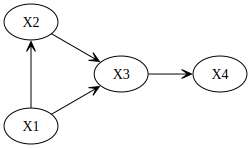

In [346]:
g=gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'}, graph_attr={'rankdir': 'LR', 'layout':'circo'})
g.edge("X1", "X2")
g.edge("X1", "X3")
g.edge("X2", "X3")
g.edge("X3", "X4")
g

In the DAG above, we have:

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) P(x_4 | x_3, x_2, x_1)
$$

What happens with the *Local Markov Assumption*?

$$
P(x_1, x_2, x_3, x_4) = P(x_1) P(x_2|x_1) P(x_3| x_2,x_1) \underbrace{P(x_4 | x_3, x_2, x_1)}_{P(x_4 | x_3)}
$$


### D-separation in Graphs vs. Conditional independence in Distributions

We saw that DAGs offer an efficient (and visually easier) way to factorize the joint probability between random variables.
We present here a summary of the cases we have seen:

- $A$ and $B$ are **marginally dependent**  ($A \not \perp B$)

 $$P(A,B) \neq P(A) \cdot P(B)$$
![img](img/ch3/DAGs_PDFs_marginallyDep.png)

- $A$ and $B$ are **marginally independent**  ($A \perp B$)

 $$P(A,B) = P(A) \cdot P(B)$$
![img](img/ch3/DAGs_PDFs_marginallyIndep.png)


- $A$ and $B$ are **conditionally independent given $C$**  ($A \perp B | C$)

 $$P(A,B|C) = P(A|C) \cdot P(B|C)$$
![img](img/ch3/DAGs_PDFs_conditionallyIndep.png)


- $A$ and $B$ are **conditionally dependent given $C$**  ($A \not \perp B | C$)

 $$P(A,B|C) \neq P(A|C) \cdot P(B|C)$$
![img](img/ch3/DAGs_PDFs_conditionallyDep.png)



### Global Markov Assumption in a Graph

Two (sets of) nodes $X$ and $Y$ are d-separated by a set of nodes $\{Z\}$ if all the paths between (any node in) $X$ and (any node in) $Y$ are blocked by $\{Z\}$. 
d-separation implies independence. 

<div class="alert alert-block alert-info">

**Theorem 3.2. (Global Markov Assumption):** Given that distribution $P$ is Markov with respect to graph $\mathcal{G}$, d-separation in a graph $\mathcal{G}$ is equivalent of conditional independent in distribution $P$. This is also called *Global Markov assumption*.

$X \!\perp\!\!\!\perp_G Y |\{Z\} \Rightarrow X \!\perp\!\!\!\perp_P Y |\{Z\}$

Because of d-separation, we can read it $P$ is Markov with respect to $\mathcal{G}$ or $P$ satisfy Markov assumption in respect to $\mathcal{G}$.

</div>

### Markov Equivalence

Markov equivalence is a concept that refers to a set of DAGs that encode the same set of conditional independence relationships among variables. In other words, Markov equivalent DAGs exhibit the same pattern of statistical dependencies among variables, despite potentially having different graphical structures.

We formalize here this concept in two steps:

First, we introduce two important graph qualities that we can use to distinguish equivalent graphs: 

- **Skeleton:** an undirected graph obtained by removing directions 

- **Immorality (v-structure or collider):** a collider structure A → C ← B, such that there is no direct edge between A and B 


<br/><br/>

<div class="alert alert-block alert-info">

**Definition 3.3. (Markov Equivalence of Graphs)):** We denote by $\mathcal{M}(\mathcal{G})$ the set of distributions that are Markovian with respect to $\mathcal{G}$ :

$\mathcal{M}(\mathcal{G})$ = {$P$ : $P$ satisfies the global (or local) Markov property with respect to $\mathcal{G}$}.

Two DAGs $\mathcal{G_1}$ and $\mathcal{G_2}$ are **Markov equivalent** if $\mathcal{M}(\mathcal{G_1})$ = $\mathcal{M}(\mathcal{G_2})$. 

* This is the case if and only if $\mathcal{G_1}$ and $\mathcal{G_2}$ satisfy the same set of d-separations, which means the Markov condition entails the same set of (conditional) independence conditions.
* The set of all DAGs that are Markov equivalent to the same distribution is called **Markov equivalence class of $\mathcal{G}$**. 

</div>

<br/><br/>

<div class="alert alert-block alert-info">

**Lemma 3.4. (Graphical criteria for Markov equivalence):** Two DAGs $\mathcal{G_1}$ and $\mathcal{G_2}$ are Markov equivalent if and only if they have the same skeleton and the same immoralities (colliders).

   - Two graphs are Markov equivalent, if they entail the same conditional independencies. 
   - Two Markov equivalent graphs can be used for representing the same set of probability distributions.

</div>

<br/><br/>

Following figure shows an example of two Markov equivalent graphs.

![img](img/ch3/Markov_equivalent.png)

* Notice that chain and fork structures are treated the same in Markov equivalent DAGs.

<br/>


Markov equivalence has important implications for causal inference because: 

* Different causal graphs can lead to the same set of observed statistical dependencies. This means that two or more DAGs that are Markov equivalent cannot be distinguished based solely on observed data and statistical tests.

* Given observational data, it is generally not possible to uniquely determine the true causal structure among variables when multiple DAGs are Markov equivalent. 

* Additional interventions or domain knowledge can sometimes help resolve the ambiguity and identify the true causal structure.



See a short video on [Markov Equivalence](https://www.youtube.com/watch?v=nnjKCtdORwY&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=64) made by Brady Neal.

### Markov Equivalent Example, a 5 Node Graph using Python

You can use the [pgmpy](https://pgmpy.org/index.html) python library to test the Markov equivalence in DAGs.

The pgmpy is a python library for Bayesian Networks with a focus on Structure Learning, Parameter Estimation, and Causal Inference.


In [352]:
from pgmpy.base import DAG
import graphviz as gr

#Ceate the DAGs
G1 = DAG()
G1.add_edges_from([('X', 'Y'), ('X', 'Z'),
                  ('Z', 'Y'), 
                  ('V', 'Z'),
                  ('U','V')])

G2 = DAG()
G2.add_edges_from([('X', 'Y'), ('X', 'Z'),
                  ('Z', 'Y'), 
                  ('V', 'Z'),
                  ('V','U')])


def plot_from_model_pgmpy(edges):
    # plot
    edges = [el for el in edges] #unpack
    g = gr.Digraph()
    
    for i in range(0, len(edges)):
        g.edge(edges[i][0],edges[i][1])
    return g

# Plot the DAGs
g1 = plot_from_model_pgmpy(G1.edges())
g2 = plot_from_model_pgmpy(G2.edges())

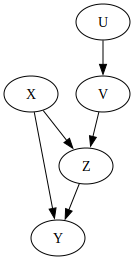

In [353]:
g1

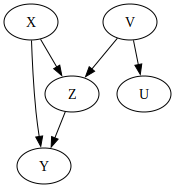

In [354]:
g2

Are $G_1$ and $G_2$ markov equivalent?

In [356]:
G1.is_iequivalent(G2)

True

What are the immoralities in $G_1$?

In [358]:
G1.get_immoralities()

{('V', 'X')}

What are the immoralities in $G_2$?

In [360]:
G2.get_immoralities()

{('V', 'X')}

## Markov Blanket

The **Markov Blanket** of a variable $X$ consists of three sets of variables:

* Parents of $X$: The parents of $X$ in the DAG are the variables that directly influence X. In terms of causality, the parents represent the direct causes of $X$.

* Children of $X$: The children of $X$ in the DAG are the variables that are directly influenced by $X$. In terms of causality, the children represent the direct effects of $X$.

* Parents of the children (spouses) of $X$: These are the variables that are parents of the children of $X$ but are not themselves parents of $X$. These variables provide information about the relationship between $X$ and its children, conditioning on other variables.

The **Markov blanket** of a node $X$, denoted by $MB(X)$ is the union of the children, parents and spouses (parents of children) of $X$. 

- $MB(X)$ is a subset that contains all the useful information about $X$. 
- The Markov blanket of a variable represents the **minimal set of variables** that need to estimate the causal effect of $X$ on any other variable in the graph. 
- $X$ is conditionally independent of all nodes outside its Markov blanket given its Markov blanket:

$$X \!\perp\!\!\!\perp N \setminus MB(X) | MB(X)$$


![img](img/ch3/Markov_blanket.png)


### Markov Blanket Example, a 5 Node Graph using Python

We use the same pgmpy python package.

Let's find the Markov blanket for node $Z$ in the previous graph $G_1$.

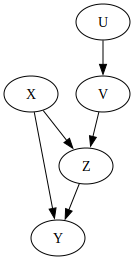

In [363]:
g1

In [364]:
G1.get_markov_blanket('Z')

['X', 'V', 'Y']

## Common Cause Principle

According to the **Common Cause Principle**, when variables $X$ and $Y$ are found to be associated or correlated, there must be a common cause or confounding variable that influences both $X$ and $Y$. In other words, the observed relationship between variable $X$ and variable $Y$ is not only indicative of a direct causal relationship but also can be the result of their shared association with a third variable.


We can use Markov property to justify **Common Cause Principle**. It states that when the random variables $X$ and $Y$ are dependent, there must be a *causal explanation* for this dependence as follows:

- $X$ is (possibly indirectly) causing $Y$, or 
- $Y$ is (possibly indirectly) causing $X$, or
- there is a (possibly unobserved) common cause $Z$ that (possibly indirectly) causes both $X$ and $Y$.

The following proposition justifies Reichenbach’s principle with respect to a notion of “causing,” namely the existence of a directed path.

<br/>

<div class="alert alert-block alert-info">

**Proposition 3.5. (Common Cause Principle):** Assume that any pair of variables $X$ and $Y$ can be embedded into a larger system in the following sense. There exists a **causal model** over the collection $\mathbf{X}$ of random variables that contains $X$ and $Y$ within graph $\mathcal{G}$. Then common cause principle follows from the Markov property. If $X$ and $Y$ are dependent, then there is:

<br/>

- either a directed path from $X$ to $Y$ , or 

<br/>

- a directed path from $Y$ to $X$,or 

<br/>

- there is a node $Z$ with a directed path from $Z$ to $X$ and from $Z$ to $Y$.

</div>


The Common Cause Principle highlights the importance of identifying and accounting for confounding variables when drawing causal conclusions from observational data. By controlling for confounders through study design, statistical adjustment, or randomized controlled experiments, researchers can reduce the likelihood of drawing incorrect causal inferences and gain a better understanding of the true causal relationships between variables.



## Causal Graphical Models

<div class="alert alert-block alert-info">

**Proposition 3.6. (Causal Model vs. Markov Property):** [Source](https://mitpress.mit.edu/books/elements-causal-inference) Assume that $P_X$ is induced by an Structural causal Model (SCM) with graph $\mathcal{G}$. Then, $P_X$ is Markovian with respect to $\mathcal{G}$. The assumption that says a distribution is Markovian with respect to the causal graph is sometimes called the **causal Markov condition**. 

</div>

<br/>

We will see in the next chapter that it is sufficient to know the observational data distribution and the related graph structure for defining intervention distributions for a process. Therefore, we define a causal graphical model as a pair consisting of a *graph* and an *observational distribution* such that the distribution is Markovian with respect to the graph (causal Markov condition).

<br/>

<div class="alert alert-block alert-info">

**Definition 3.7 (Causal graphical model):** A causal graphical model over random variables $\mathbf{X}=\left(X_{1}, \ldots, X_{d}\right)$ contains a graph $\mathcal{G}$ and a collection of functions (structure) $f_{j}\left(x_{j}, x_{\mathbf{P A}_{j}^{\mathcal{G}}}\right)$ that integrate to $1:$

$$
\int f_{j}\left(x_{j}, x_{\mathbf{P A}_{j}^{\mathcal{G}}}\right) d x_{j}=1
$$

These collection of functions (structure) induces a distribution $P_{\mathbf{X}}$ over $\mathbf{X}$ via

$$
p\left(x_{1}, \ldots, x_{d}\right)=\prod_{j=1}^{d} f_{j}\left(x_{j}, x_{\mathbf{PA_j}}^{\mathcal{G}}\right)
$$

and thus play the role of conditionals: 

$$
f_{j}\left(x_{j}, x_{\mathbf{PA_j^\mathcal{G}}}\right) = p\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right)
$$

Refer to [Causal Elements Book, Chapter 6](https://mitpress.mit.edu/books/elements-causal-inference) for proof.
</div>

<br/>

If a distribution $P_X$ over $X$ is Markovian with respect to a graph $\mathcal{G}$ and allows for a strictly positive, continuous density $p$, the pair $(P_X,\mathcal{G})$ defines a **causal graphical model** by:

$$
f_j\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right) = p\left(x_{j} \mid x_{\mathbf{PA_j}^\mathcal{G}}\right)
$$


<br/>

See a short video on [Causal Graphs](https://www.youtube.com/watch?v=vjvP9oRgZyM&list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0&index=21) made by Brady Neal.


## Faithfulness and Causal Minimality


Faithfulness assumption suggests that a causal model is faithful if and only if it satisfies the following condition:

*For every conditional independence relationship that holds in the probability distribution induced by the causal model, there exists a corresponding d-separation relationship in the causal graph.*

In simpler terms, faithfulness asserts that if two variables, $X$ and $Y$, are conditionally independent given a set of other variables $Z$ in a causal model, then there should be no direct causal link or path between $X$ and $Y$ in the underlying DAG $\mathcal{G}$ when conditioning on $Z$.


As we seen, the **Markov** assumption enables us to undrestand **independences** from a graph structure. **Faithfulness** allows us to infer **dependences** from the graph structure.


<div class="alert alert-block alert-info">

**Definition 3.8 (Faithfulness and causal minimality):** Consider a distribution $P_\mathbf{X}$ and a DAG $\mathcal{G}$.
    
**(a)** $P_\mathbf{X}$ is faithfulls to DAG $\mathcal{G}$ if

$$
\mathbf{A} \!\perp\!\!\!\perp \mathbf{B}\left|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}\right| \mathbf{C}
$$

for all  all disjoint vertex sets $\mathbf{A}, \mathbf{B}, \mathbf{C}$.

**(b)** A distribution satisfies causal minimality with respect to $\mathcal{G}$ if it is Markovian with respect to $\mathcal{G}$, but not to any proper subgraph of $\mathcal{G}$.
</div>

<br/>

Part (a) posits an implication that is the opposite of the global Markov condition:

$$
\mathbf{A} \!\perp\!\!\!\perp_{\mathcal{G}} \mathbf{B}|\mathbf{C} \Rightarrow \mathbf{A} \!\perp\!\!\!\perp \mathbf{B}| \mathbf{C},
$$

<div class="alert alert-block alert-info">

**Proposition 3.9 (Faithfulness implies causal minimality):** If $P_\mathbf{X}$ is faithful and Markovian with respect to $\mathcal{G}$, then causal minimality is satisfied.
    
</div>

A distribution is minimal with respect to $\mathcal{G}$ if and only if there is no node that is conditionally independent of any of its parents, given the remaining parents.


However, it's important to note that the **Faithfulness assumption** does not guarantee that all causal relationships can be identified or estimated. There may be cases where causal relationships are not reflected in the observed data due to various reasons such as unobserved confounding or measurement error.



## Causal Sufficiency

A set of variables $P_\mathbf{X}$ is usually said to be **causally sufficient** if there is no hidden common cause $C \notin \mathbf{X}$ that is causing more than one variable in $\mathbf{X}$.

- The definition **causally sufficient** matches the intuitive meaning of the set of “relevant” variables. However, it uses the concept of a **common cause**.

- a variable $C$ is a **common cause** of $X$ and $Y$ if there is a directed path from $C$ to $X$ and $Y$ that does not include $Y$ and $X$, respectively.

- **Common causes** are also called **confounders** and we use these terms interchangeably.
- **Causal Sufficiency** describes when a set of variables is large enough to perform causal reasoning, in the sense of computing observational and intervention distributions.


<div class="alert alert-block alert-info">

**Definition 3.10 (Causal Sufficiency):** We call a set $\mathbf{X}$ of variables interventionally sufficient if there exists an SCM over $\mathbf{X}$ that cannot be falsified as an interventional model. It also induces (create) observational and intervention distributions that coincide with what we observe in practice.

</div>



For more information on Causal or Interventional sufficiency, see Chapter 9. Hidden Variables from [Elements of Causal Inference](https://mitpress.mit.edu/books/elements-causal-inference) book.




## References

This chapter contents are highly inspired by the [Elements of Causal Inference (Open Access) book](https://mitpress.mit.edu/books/elements-causal-inference) by By Jonas Peters, Dominik Janzing and [Bernhard Schölkopf](https://www.is.mpg.de/~bs) especially for definitions and propositions.

We also used a graph example from the [Introduction to Causal Inference](https://www.bradyneal.com/causal-inference-course) course by Brady Neal. He made a very nice open-access online course accompanied by videos on [YouTube](https://youtube.com/playlist?list=PLoazKTcS0Rzb6bb9L508cyJ1z-U9iWkA0).

More proofs and theores can ber find in Judea Pearl's [Causal Inference in Statistics: A Primer](https://www.wiley.com/en-us/Causal+Inference+in+Statistics%3A+A+Primer-p-9781119186847).
